In [1]:
%pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 224.1 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# look at the data
import pandas as pd
import numpy as np
import os

for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/gender_submission.csv
./input/test.csv
./input/train.csv


In [4]:
train = pd.read_csv('./input/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test = pd.read_csv('./input/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# assuming all female passengers survived 

women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [7]:
# rate of men who survived

men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men) / len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


Text(0, 0.5, 'Frequency')

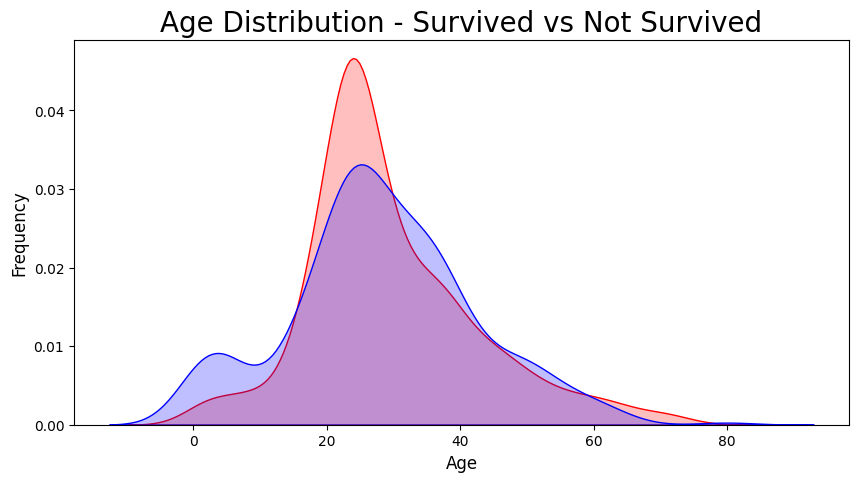

In [8]:
# look at how age affects survival 

# first, fill in missing values with median age for each class
train["Age"].fillna(train.groupby("Pclass")["Age"].transform("median"), inplace=True)

# now, look at the distribution of ages for each class
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.kdeplot(train.loc[(train['Survived'] == 0), 'Age'], color='r', fill=True)
sns.kdeplot(train.loc[(train['Survived'] == 1), 'Age'], color='b', fill=True)

plt.title('Age Distribution - Survived vs Not Survived', fontsize = 20)
plt.xlabel("Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)


Death spike around early 20s and 30s. This is probably due to the fact that most of the people in the ship were young adults. The spike around 80s is probably due to the fact that most of the elderly people were given priority to get on the lifeboats.

In [9]:
# look at survaival rate by from which port they embarked

embarked_C = train.loc[train.Embarked == 'C']["Survived"]
rate_embarked_C = sum(embarked_C)/len(embarked_C)

print("% of passengers who embarked at Cherbourg who survived:", rate_embarked_C)

# Queenstown

embarked_Q = train.loc[train.Embarked == 'Q']["Survived"]
rate_embarked_Q = sum(embarked_Q)/len(embarked_Q)

print("% of passengers who embarked at Queenstown who survived:", rate_embarked_Q)

# Southampton
embarked_S = train.loc[train.Embarked == 'S']["Survived"]
rate_embarked_S = sum(embarked_S)/len(embarked_S)

print("% of passengers who embarked at Southampton who survived:", rate_embarked_S)


% of passengers who embarked at Cherbourg who survived: 0.5535714285714286
% of passengers who embarked at Queenstown who survived: 0.38961038961038963
% of passengers who embarked at Southampton who survived: 0.33695652173913043


If you embarked from cherbourg, you had a higher chance of survival.

In [10]:
# find out what percentage of percentage of passengers who embarked from C had 1st class tickets

embarked_C_1st = train.loc[(train.Embarked == 'C') & (train.Pclass == 1)]["Survived"]
rate_embarked_C_1st = sum(embarked_C_1st)/len(embarked_C_1st)

print("% of passengers who embarked at Cherbourg and had 1st class tickets who survived:", rate_embarked_C_1st)

% of passengers who embarked at Cherbourg and had 1st class tickets who survived: 0.6941176470588235


Makes sense. The first class passengers were given priority to get on the lifeboats.

In [11]:
# look at entries with age with 15 and below who also had a Pclass of 2

young_2nd = train.loc[(train.Age <= 15) & (train.Pclass == 2)]["Survived"]
rate_young_2nd = sum(young_2nd)/len(young_2nd)

print("% of passengers who were 18 and below and had 2nd class tickets who survived:", rate_young_2nd)

% of passengers who were 18 and below and had 2nd class tickets who survived: 1.0


Changed my conditions a bit from the age of 18 and under to 15 and under. This is based on the fact that being classed as a child is based on the age of 15 in the UK.

In [12]:
# look at entries with sex being female and Pclass being 1

women_1st = train.loc[(train.Sex == "female") & (train.Pclass == 1)]["Survived"]
rate_women_1st = sum(women_1st) / len(women_1st)

print("% of women who were in 1st class and survived", rate_women_1st)

% of women who were in 1st class and survived 0.9680851063829787


Most accurate data. The data is based on the fact that the first class passengers were given priority to get on the lifeboats.

In [13]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

def k_fold_cross_validation(model, X, y, k=10):
    kfold = KFold(n_splits=k, shuffle=False)
    scores = cross_val_score(model, X, y, cv=kfold)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [18]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]
# if you were younger than 15 or older than 50, you were more likely to survive
# if you were a women, the higher your Pclass, the more likely you were to survive
# if you embarked from Cherbourg, you were more likely to survive

features = ["Age", "Pclass", "Sex", "Embarked"]

# dealt with missing values
train["Age"].fillna(train.groupby("Pclass")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Pclass")["Age"].transform("median"), inplace=True)

train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
test["Embarked"].fillna(test["Embarked"].mode()[0], inplace=True)

X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=120, max_depth=5, random_state=1)
model.fit(X, y)
k_fold_cross_validation(model, X, y)
predictions = model.predict(X_test)

Accuracy: 0.81 (+/- 0.05)


In [15]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [16]:
gender_sub = pd.read_csv('./input/gender_submission.csv')

# check the accuracy of gender submission
